In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib Inline

In [446]:
data=pd.read_csv(r'E:\AI\Exchange rate Proejct\data\Final_data (1federal).csv')
data.shape
data.head()

,Dates,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,Exchange Rate per day (USDPKR),Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,tradebalance(usd in millions),Credit (million USD),Debit(million USD),BOP(million USD),Unnamed: 43,Debt in Million US Dollars
0,1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,160.17,160.47,...,160.05,160.34,160.19,159.63,NaN,NaN,NaN,NaN,NaN,"113,331"
1,2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,159.46,159.39,...,159.85,160.11,160.47,0.00,"-1,949",5467.0,5020.0,447.0,NaN,"113,331"
2,3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,160.45,160.45,...,164.53,164.96,164.94,165.07,"-1,792",5068.0,4653.0,415.0,NaN,"113,331"
3,4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,165.65,165.95,...,166.05,165.44,165.38,0.00,"-1,950",5016.0,4957.0,59.0,NaN,"113,803"
4,5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,165.48,167.43,...,167.60,167.01,167.50,167.63,"-1,829",4279.0,4068.0,211.0,NaN,"113,803"


In [449]:

data=data.iloc[:,0:2]
data.head()
data.shape

(192, 2)

<Figure size 720x360 with 0 Axes>

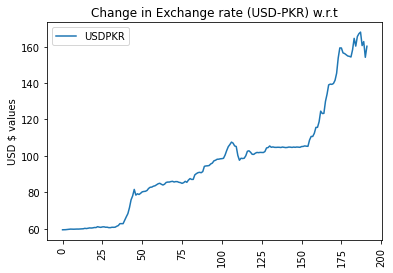

In [450]:
plt.figure(figsize=(10,5))
data.plot()
plt.xticks(rotation ='vertical')
plt.ylabel('USD $ values')
plt.title('Change in Exchange rate (USD-PKR) w.r.t')
plt.show()

In [451]:
#rename columns 
data.columns=['ds','y']
data.head()

,ds,y
0,1/1/2005,59.32
1,2/1/2005,59.35
2,3/1/2005,59.39
3,4/1/2005,59.48
4,5/1/2005,59.56


In [452]:
#convert dates to date-times datatype
data['ds']=pd.to_datetime(data['ds'])

# Testing accuracy

In [453]:
train = data.drop(data.index[-12:])
print(train.tail())

            ds       y
175 2019-08-01  159.32
176 2019-09-01  156.64
177 2019-10-01  156.27
178 2019-11-01  155.60
179 2019-12-01  154.92


In [454]:
test=pd.DataFrame(data[-12:])
test.drop(['y'],axis=1)

,ds
180,2020-01-01
181,2020-02-01
182,2020-03-01
183,2020-04-01
184,2020-05-01
185,2020-06-01
186,2020-07-01
187,2020-08-01
188,2020-09-01
189,2020-10-01


In [455]:
test_model = Prophet()

In [456]:
test_model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [457]:
forecast=test_model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2020-08-01,163.236730,157.856618,168.462513
8,2020-09-01,164.671557,159.170938,170.004222
9,2020-10-01,166.604688,161.143114,172.407260
10,2020-11-01,167.004878,161.967906,172.431811
11,2020-12-01,168.699842,163.245912,174.406451


In [458]:
y_test = data['y'][-12:].values
y_pred = forecast['yhat'][-12:].values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,154.73,153.101359
1,154.38,154.041654
2,158.35,154.496274
3,164.63,156.342364
4,160.37,157.880896
5,165.61,159.541493
6,167.20,161.415668
7,168.06,163.236730
8,160.66,164.671557
9,162.85,166.604688


In [481]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
#print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
#print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
#print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
#print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
#print('Regressor score:', regressor.score(X_test, y_test))
sm.mean_squared_error(y_test, y_pred, squared=False)

Mean absolute error = 5.19


6.131182700464485

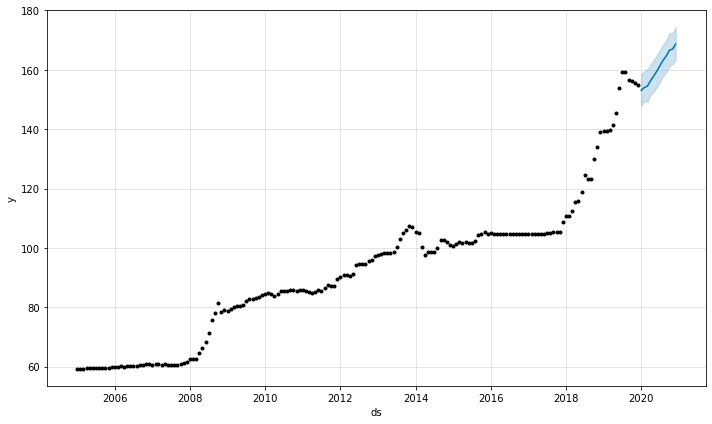

In [464]:
fig1 = test_model.plot(forecast)

# Final Forecasting

In [465]:

final_model=Prophet()
final_model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [479]:
future = final_model.make_future_dataframe(periods=24, freq='MS')
future.tail()

,ds
211,2022-08-01
212,2022-09-01
213,2022-10-01
214,2022-11-01
215,2022-12-01


In [467]:
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,58.178916,53.730376,62.829055
1,2005-02-01,57.958762,53.076503,62.621304
2,2005-03-01,56.703261,52.056800,61.255711
3,2005-04-01,57.254103,52.516420,62.140493
4,2005-05-01,56.975400,52.250629,61.948695
...,...,...,...,...
211,2022-08-01,204.841721,199.470605,210.648963
212,2022-09-01,206.094950,200.463667,212.106688
213,2022-10-01,207.784918,202.044266,213.897617
214,2022-11-01,208.938273,202.844616,214.980639


In [480]:
forecasted=pd.DataFrame(forecast[-24:])
forecasted[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
192,2021-01-01,174.861278,170.023173,179.737616
193,2021-02-01,176.070811,171.684231,180.653546
194,2021-03-01,176.106639,171.331728,181.021311
195,2021-04-01,178.087168,173.272540,182.574513
196,2021-05-01,179.192031,174.471760,184.268552
197,2021-06-01,181.761995,177.179687,186.440594
198,2021-07-01,184.037720,179.025468,188.998139
199,2021-08-01,185.897470,180.845342,190.921953
200,2021-09-01,186.775185,181.863841,191.676829
201,2021-10-01,188.805218,183.917659,194.121895


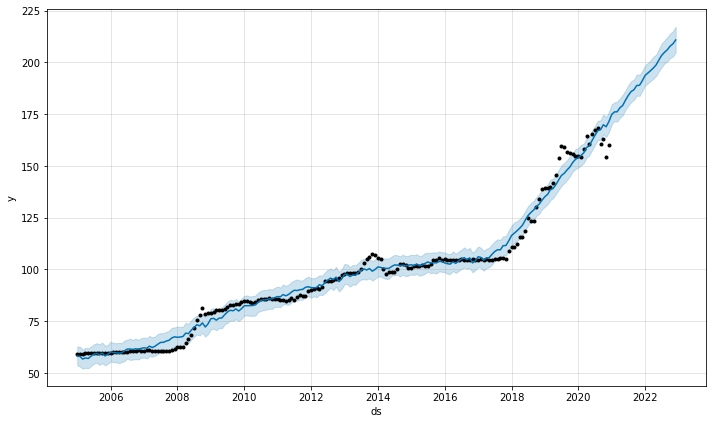

In [471]:
final_model.plot(forecast)
plt.show()

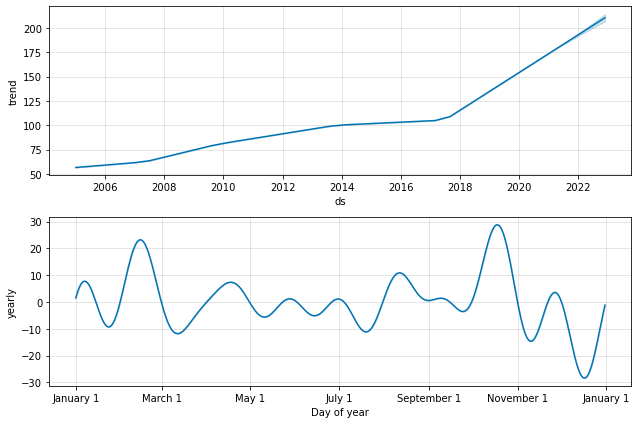

In [472]:
fig2 = final_model.plot_components(forecast)


In [486]:
trace = go.Scatter(
    name = 'Actual value',
    mode = 'markers',
    x = list(future['ds']),
    y = list(data['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)
trace1 = go.Scatter(
    name = 'Predicted Value',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)

upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)



In [487]:
data1 = [ trace1, lower_band, upper_band, trace]

layout = dict(title='USD-PKR Exchange Rates Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data1,layout=layout)

In [488]:
plt.savefig('btc02.png')

<Figure size 432x288 with 0 Axes>

In [489]:
py.offline.iplot(figure)
# plt.show()